In [1]:
from matplotlib import pyplot as plt
import pickle

In [2]:
emojis = []
counts = []
with open('data/stat.txt') as fin:
    for line in fin:
        emoji = line[0]
        cnt = int(line[2:])
        emojis.append(emoji)
        counts.append(cnt)

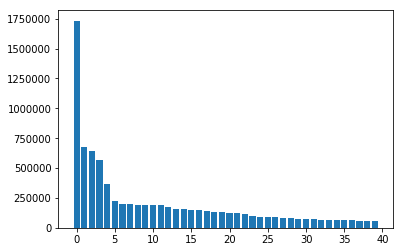

In [3]:
plt.bar(range(40), counts[:40])
plt.show()

In [4]:
n = len(counts)
covered = [counts[0]] * n
for i in range(1, len(counts)):
    covered[i] = covered[i-1] + counts[i]
total = covered[-1]
covered = [x / total for x in covered]

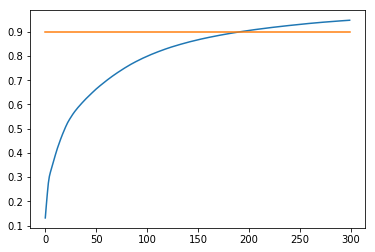

In [7]:
plt.plot(range(300), covered[:300])
plt.plot(range(300), [0.9]*300)
plt.show()

In [8]:
with open('data/selected.txt', 'wb') as fout:
    fout.write(''.join(emojis[:100]).encode('utf8'))
    fout.write(b'\n')

In [9]:
with open('data/selected.txt', 'rb') as fin:
    for ch in fin.readline().decode('utf-8'):
        print(ch)

😂
😍
😭
❤
🔥
😊
👏
🏽
😩
🏼
💕
🏻
🏾
😘
✨
💯
🙏
🌹
💀
🙄
🙌
🎉
👌
♥
💙
👍
🙃
👀
💖
💪
☺
💋
😎
💜
😉
💥
😳
💗
👉
♀
💞
😏
😁
😅
😈
⚡
💓
😢
😜
😱
😒
😌
🎶
♡
★
🌟
🏆
💛
🙂
💦
😋
🙈
✌
👇
💘
💔
💚
👑
😆
😴
➡
👊
😻
😀
✊
🌸
💃
❄
😫
😇
😔
😛
😄
🐐
♂
🚨
😤
🗣
👅
😬
✔
😡
💰
❗
🎈
⚽
😕
📷
💫
✅




In [10]:
with open('data/plain_dataset.pickle', 'rb') as fin:
    X, Y = pickle.load(fin)

In [11]:
with open('data/dataset.pickle', 'rb') as fin:
    dataset = pickle.load(fin)

In [2]:
with open('data/plain_dataset_meta.pickle', 'rb') as fin:
    dataset_meta = pickle.load(fin)

In [15]:
def recover_sent(tokens, predict):
    alphabet = dataset_meta['alphabet']
    emojis = dataset_meta['emoji']
    return ''.join(alphabet[t] for t in tokens), emojis[predict]

def recover_n(n):
    return recover_sent(X[n], Y[n])

In [16]:
for i in range(80, 100):
    print(recover_n(i))

('[START]bed, stay in bed... the feeling of your skin locked in my head. http t.co', '😍')
("[START]steph curry is steph curry though it's was only that one game though lmao", '😂')
('[START]you know it was man', '😂')
("[START]welcome n we've been looking forward to meeting you!it's gunna be a good un", '👌')
('[START]dont forget about the mass streaming tonight!! starting at npm kst!! url', '😊')
('[START]yep!! they are shooting together!! happy na ang neyshen!! url', '😍')
("[START]i'm not sure why we're having a bikini party in january but i'm not complaining url", '😏')
("[START]since its a new year.....my new year's resolution is to get to married", '💕')
('[START]runtown mad over you', '❤')
('[START]i fucked with somebody nigga before and ima expose ... tf this gotta do with me ? url', '💀')
("[START]do you think she's cute? yes or nah? yeeeeeeesss url", '💖')
("[START]does anybody else's cat sleep with their tongue out like this?", '😂')
("[START]can y'all niggas stop hating on obama like

In [11]:
'", "'.join(dataset_meta['emoji'])

'🎉", "🎈", "🏽", "🙄", "👑", "✨", "💞", "💕", "❤", "😏", "🔥", "😎", "💀", "😂", "😍", "😊", "😈", "♥", "💔", "😅", "🌟", "😜", "😭", "💗", "😋", "🌹", "😩", "💦", "♂", "🙏", "☺", "💯", "😆", "➡", "🙌", "💜", "✔", "💓", "💙", "😀", "👉", "😬", "👌", "😘", "♡", "🙃", "😁", "🙂", "👀", "💃", "💛", "👏", "👍", "😛", "💪", "💋", "😻", "😉", "😄", "😴", "💥", "💖", "😤", "🚨", "⚡", "😳", "🎶", "🗣", "👅", "😫", "✌", "💚", "🙈", "😇", "😒", "😌", "❗", "😢", "😕", "👊", "🌙", "👇", "😔", "❄", "💘", "✊", "💫", "😡", "♀", "🏆", "🌸", "★", "😱", "📷", "💰", "⚽", "🐐", "✅'

In [12]:
from tensorflow import GraphDef

In [13]:
g = GraphDef()

In [14]:
with open('export/inference.pb', 'rb') as fin:
    sg = fin.read()
g.ParseFromString(sg)

In [19]:
with open('/tmp/graph.txt', 'w') as fout:
    fout.write(str(g))

In [20]:
with open('export/frozen.pb', 'rb') as fin:
    sg = fin.read()
g.ParseFromString(sg)
with open('/tmp/graph2.txt', 'w') as fout:
    fout.write(str(g))